# Whatsapp Group chat Analysis
> Analysis of Whatsapp Groupchat -> PEACE BROS

- toc: true 
- badges: true
- comments: true
- categories: [analysis, jupyter]

In [1]:
#hide
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#hide
#importing important libraries
!pip install emoji
!pip install --upgrade plotly
import re
import pandas as pd
import regex
import emoji
import numpy as np
from collections import Counter
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from IPython.display import display

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.10.0)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



### Data cleaning

In [3]:
#collapse-show
def insert(dict_name, key):
    if key in dict_name.keys():
        dict_name[key] = dict_name[key]+1
    else:
        dict_name[key] = 1
#opening the chat file
f = open('/content/drive/My Drive/Colab Notebooks/chat.txt', encoding='utf8')

l = []
ind = -1
for i in f:
    s = i.rstrip('\n')
    r = re.match(r'[\d]{1,2}/[\d]{1,2}/[\d]{2}, [\d]{2}:[\d]{2} -', s)
    if r:
        l.append(s)
        ind = ind+1
    else:
        l[ind] = l[ind]+s
f.close()
#closed the file

In [4]:
#collapse-show
#parsing all the features from each line in the text
date = {}
time = {'00': 0, '01': 0, '02': 0, '03': 0, '04': 0, '05': 0, '06': 0, '07': 0, '08': 0, '09': 0, '10': 0, '11': 0, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0, '17': 0, '18': 0, '19': 0, '20': 0, '21': 0, '22': 0, '23': 0}
user = {}
year = {}
month = {'1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}

data = []

for i in l:
    a = i.strip().split(',')
    b = a[1].strip().split('-')
    c = b[1].strip().split(':',1)
    y = a[0].split('/')
    
    insert(year, y[2].strip())
    insert(month, y[0].strip())
    insert(date, a[0].strip())
    insert(time, b[0].strip(':')[0])
    
    str_usr_name = ''
    msg = ''
    
    if len(c)>=2:
        str_usr_name = c[0]
        msg = c[1][1:]
    else:
        str_usr_name = 'N/A'
        msg = c[0][1:]
    
    data.append([a[0],b[0],str_usr_name,msg])
    
    insert(user,str_usr_name)

In [5]:
# making a dataframe
df = pd.DataFrame(data, columns=['Date','Time','Name','Message'])
df.head()

,Date,Time,Name,Message
0,18/03/20,17:34,N/A,essages and calls are end
1,14/03/20,12:11,N/A,"arsha created group ""Corona's R shud be rollin"""
2,14/03/20,12:11,N/A,ou were added
3,18/03/20,18:37,Harshith,https://www.youtube.com/watch?v=
4,18/03/20,19:06,Harshith,musalodiki problem ledhu


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13198 entries, 0 to 13197
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     13198 non-null  object
 1   Time     13198 non-null  object
 2   Name     13198 non-null  object
 3   Message  13198 non-null  object
dtypes: object(4)
memory usage: 412.6+ KB


Looking at the Names of the members in th group

In [7]:
names = df.Name.unique()
names

array(['N/A', 'Harshith', 'Meghana', 'pk', 'Jithendra', 'Uday', 'Varsha',
       'Kiddo', 'Tej',
       'Meghana changed the subject from "✈ ✈  America 🤙🏼🤙🏼315" to "Peace bro ',
       'Uday changed the subject from "Peace bro '], dtype=object)

Removing the rows with non-members

In [8]:
#hide
index_names = df[ df['Name'] == 'N/A'].index 
df.drop(index_names, inplace = True)
index_names = df[ df['Name'] == 'Meghana changed the subject from "✈ ✈  America 🤙🏼🤙🏼315" to "Peace bro '].index 
df.drop(index_names, inplace = True)
index_names = df[ df['Name'] == 'Uday changed the subject from "Peace bro '].index 
df.drop(index_names, inplace = True)
names = df.Name.unique()
names

array(['Harshith', 'Meghana', 'pk', 'Jithendra', 'Uday', 'Varsha',
       'Kiddo', 'Tej'], dtype=object)

In [9]:
df.head()

,Date,Time,Name,Message
3,18/03/20,18:37,Harshith,https://www.youtube.com/watch?v=
4,18/03/20,19:06,Harshith,musalodiki problem ledhu
5,18/03/20,19:08,Meghana,Yaa😅
6,18/03/20,19:13,pk,This message was deleted
7,18/03/20,19:13,pk,This message was deleted


In [10]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df.head()

,Date,Time,Name,Message
0,18/03/20,18:37,Harshith,https://www.youtube.com/watch?v=
1,18/03/20,19:06,Harshith,musalodiki problem ledhu
2,18/03/20,19:08,Meghana,Yaa😅
3,18/03/20,19:13,pk,This message was deleted
4,18/03/20,19:13,pk,This message was deleted


DataFrame is ready now!

### Data Analysis

In [11]:
df.Name.unique()

array(['Harshith', 'Meghana', 'pk', 'Jithendra', 'Uday', 'Varsha',
       'Kiddo', 'Tej'], dtype=object)

Seperating Emojis into a new column

In [12]:
def find_emoji(text):
    emojis = []
    txt = regex.findall(r'\X', text)
    for word in txt:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emojis.append(word)
        
    return emojis
df['emoji'] = df['Message'].apply(find_emoji)

In [13]:
url_pattern = r'(https?://\S+)'
df['url_count'] = df.Message.apply(lambda x: re.findall(url_pattern, x)).str.len()

df_links = df[df['url_count'] != 0]

In [14]:
media_count = df[df["Message"] == '<Media omitted>'].shape[0]
message_count = df.shape[0]
emoji_count = sum(df['emoji'].str.len())
links_count = df_links.shape[0]

## Group Stats

In [15]:
#collapse-hide
print("Group Stats:")
print("No.of Messages: ", message_count)
print("No.of Media: ", media_count)
print("No.of Emojis: ",emoji_count)
print("No.of Links: ",links_count)

Group Stats:
No.of Messages:  13181
No.of Media:  1718
No.of Emojis:  3974
No.of Links:  115


In [16]:
#collapse-hide
df_media = df[df['Message'] == '<Media omitted>']
df_del = df[df['Message'] == 'This message was deleted']
df_text = df.drop(df_media.index).drop(df_del.index)

In [17]:
df_text['word_count'] = df_text['Message'].apply(lambda s : len(s.split(' ')))
df_text.head()

,Date,Time,Name,Message,emoji,url_count,word_count
0,18/03/20,18:37,Harshith,https://www.youtube.com/watch?v=,[],1,1
1,18/03/20,19:06,Harshith,musalodiki problem ledhu,[],0,3
2,18/03/20,19:08,Meghana,Yaa😅,[😅],0,1
5,18/03/20,19:15,Harshith,?,[],0,1
7,18/03/20,19:17,pk,Ende,[],0,1


## Stats of each group member

Stas of Harshith:

Text messages sent:  1392
Media sent:  436
Deleted messages:  5
Total messages:  1833
Emojis sent:  630
Links sent:  24


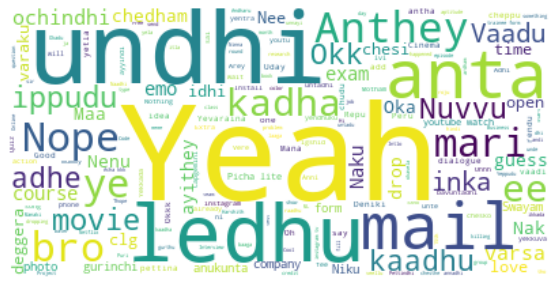


Stas of Meghana:

Text messages sent:  1581
Media sent:  196
Deleted messages:  11
Total messages:  1788
Emojis sent:  302
Links sent:  18


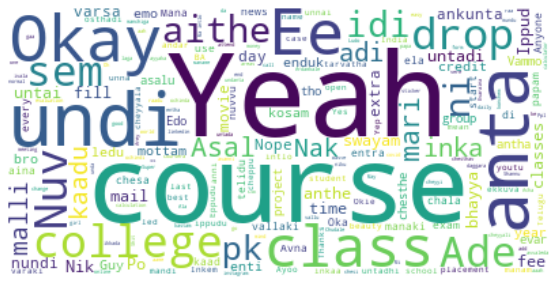


Stas of pk:

Text messages sent:  2107
Media sent:  107
Deleted messages:  13
Total messages:  2227
Emojis sent:  351
Links sent:  9


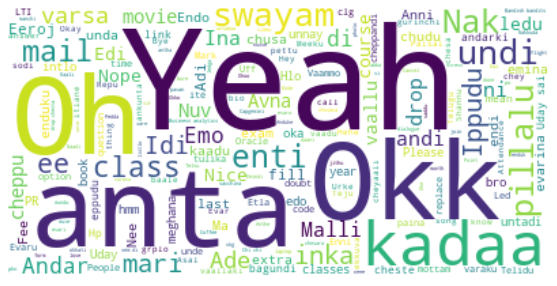


Stas of Jithendra:

Text messages sent:  1453
Media sent:  316
Deleted messages:  0
Total messages:  1769
Emojis sent:  637
Links sent:  22


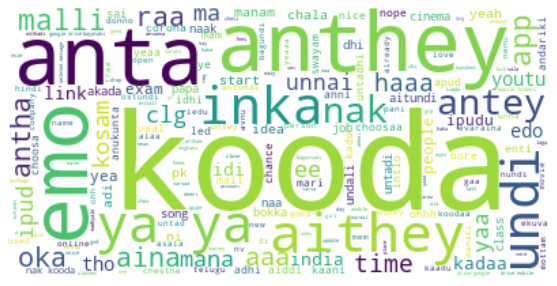


Stas of Uday:

Text messages sent:  1896
Media sent:  364
Deleted messages:  2
Total messages:  2262
Emojis sent:  210
Links sent:  14


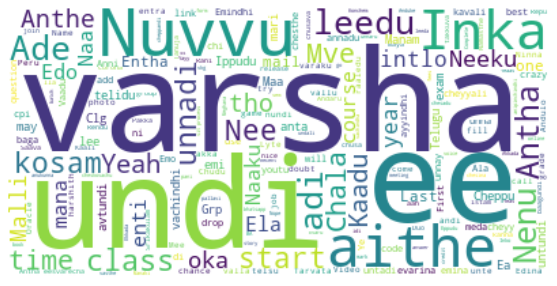


Stas of Varsha:

Text messages sent:  2171
Media sent:  92
Deleted messages:  5
Total messages:  2268
Emojis sent:  1173
Links sent:  13


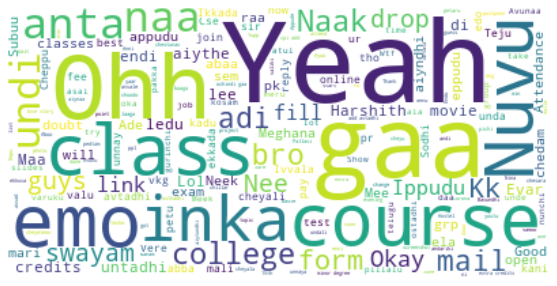


Stas of Kiddo:

Text messages sent:  515
Media sent:  144
Deleted messages:  4
Total messages:  663
Emojis sent:  282
Links sent:  8


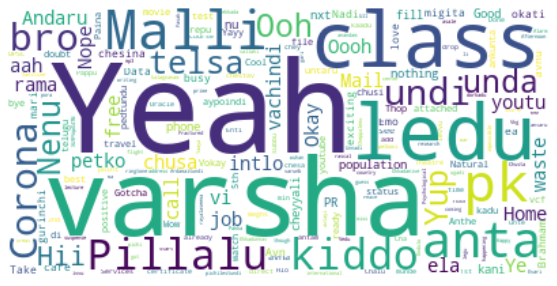


Stas of Tej:

Text messages sent:  308
Media sent:  63
Deleted messages:  0
Total messages:  371
Emojis sent:  389
Links sent:  8


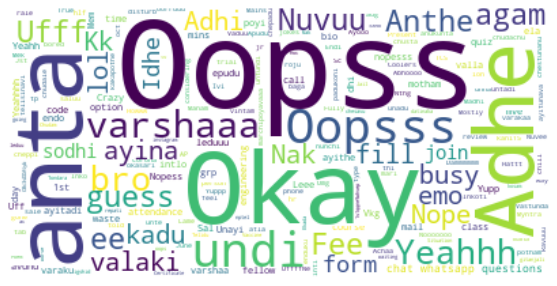

In [18]:
#collapse-hide
for i in range(len(names)):
    text_messages = df_text[df_text['Name'] == names[i]].shape[0]
    media_messages = df_media[df_media['Name'] == names[i]].shape[0]
    deleted_messages = df_del[df_del['Name'] == names[i]].shape[0]
    total_messages = df[df['Name'] == names[i]].shape[0]
    emoji_messages = sum(df[df['Name'] == names[i]]['emoji'].str.len())
    links_messages = sum(df[df['Name'] == names[i]]['url_count'])
    
    print(f'Stas of {names[i]}:')
    print()
    print('Text messages sent: ',text_messages)
    print('Media sent: ',media_messages)
    print('Deleted messages: ',deleted_messages)
    print('Total messages: ',total_messages)
    print('Emojis sent: ',emoji_messages)
    print('Links sent: ', links_messages)
    dummy_df= df_text[df_text['Name'] == names[i]]

    stopwords = set(STOPWORDS)
    stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","la","eh","ne","le",'kuda','aa','lo','Haa','ante','nen','kada',
                     'Mmm','ok','https'])
    text = " ".join(x for x in dummy_df.Message)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    plt.figure( figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()    
    
    print()

## Distribution of messages among members

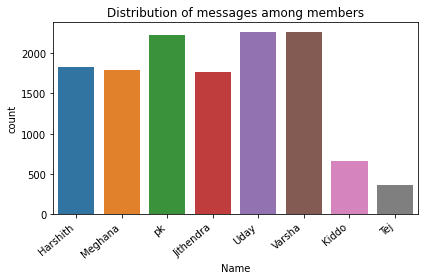

In [19]:
#collapse-hide
ax = sns.countplot(x='Name',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Distribution of messages among members')
plt.tight_layout()
plt.show()

## Dates when our group is most active

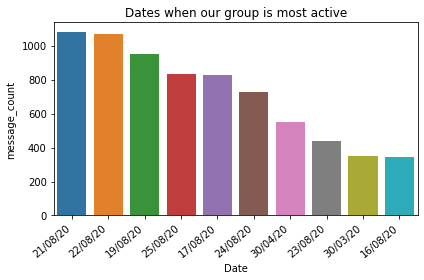

In [20]:
#collapse-hide
df_Date = df['Date'].value_counts()
dates = list(df_Date.index)
msg_count = df_Date.values
df_Date = pd.DataFrame({'Date':dates, 'message_count':msg_count})
ax = sns.barplot(x='Date',y='message_count',data=df_Date.head(10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Dates when our group is most active')
plt.tight_layout()
plt.show()

- Our group is most active during 15th August to 25 August

## Distribution of messages along Months

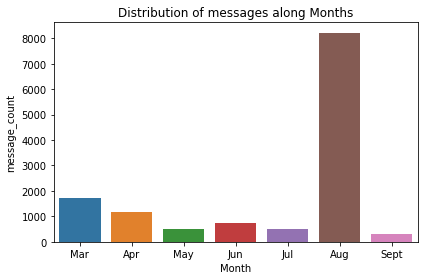

In [21]:
#collapse-hide
df_Date['Date'] = pd.to_datetime(df_Date.Date, format='%d/%m/%y')
df_Date['Month'] = df_Date.Date.dt.month
df_Date['Month_name'] = df_Date.Date.dt.month_name()
df_month = df_Date[['Month','message_count']]
aggregation_functions = {'message_count': 'sum'}
df_month = df_month.groupby(df_month['Month']).aggregate(aggregation_functions)
df_month.reset_index(inplace=True)
ax = sns.barplot(data=df_month,x='Month',y='message_count')
months = ['Mar','Apr','May','Jun','Jul','Aug','Sept']
ax.set_xticklabels(labels=months)
ax.set_title('Distribution of messages along Months')
plt.tight_layout()
plt.show()

- Messages in August are far more than messages in other months

## Distribution of messages along days in week

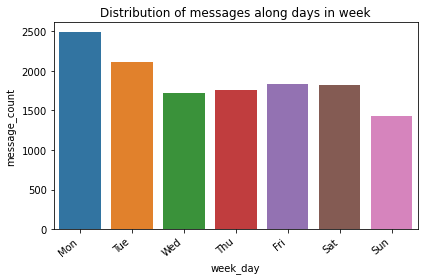

In [22]:
#collapse-hide
df_Date['week_day'] = df_Date.Date.dt.weekday
df_Date['week_day_name'] = df_Date.Date.dt.day_name()
df_day = df_Date[['week_day','message_count']]
aggregation_functions = {'message_count': 'sum'}
df_day = df_day.groupby(df_day['week_day']).aggregate(aggregation_functions)
df_day.reset_index(inplace=True)
ax = sns.barplot(data=df_day,x='week_day',y='message_count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Distribution of messages among days in week')
months = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
ax.set_xticklabels(labels=months)
ax.set_title('Distribution of messages along days in week')
plt.tight_layout()
plt.show()

- The group is very active during Monday and Tuesday

## Day wise distribution in every month

In [23]:
#collapse-hide
fig = px.sunburst(df_Date, path=['Month_name', 'week_day_name'], values='message_count')
fig.show()

## The times when the group is most active

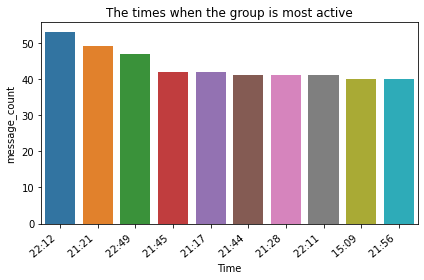

In [24]:
#collapse-hide
df_Time = df['Time'].value_counts()
times = list(df_Time.index)
msg_count = df_Time.values
df_Time = pd.DataFrame({'Time':times, 'message_count':msg_count})
ax = sns.barplot(data=df_Time.head(10),x='Time',y='message_count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('The times when the group is most active')
plt.tight_layout()
plt.show()

- The group is most active in nights between 9:00PM and 10:30PM

## Distribution of deleted messages

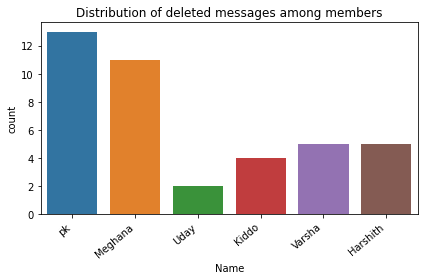

In [25]:
#collapse-hide
ax = sns.countplot(x='Name',data=df_del)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Distribution of deleted messages among members')
plt.tight_layout()
plt.show()

## Distribution of media sent in the group

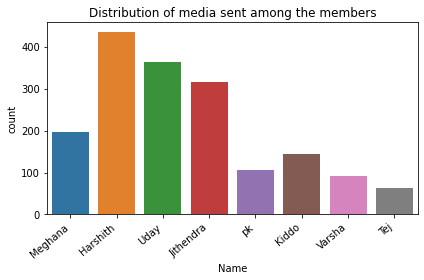

In [26]:
#collapse-hide
ax = sns.countplot(x='Name',data=df_media)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Distribution of media sent among the members')
plt.tight_layout()
plt.show()

## Distribution of links sent in the group

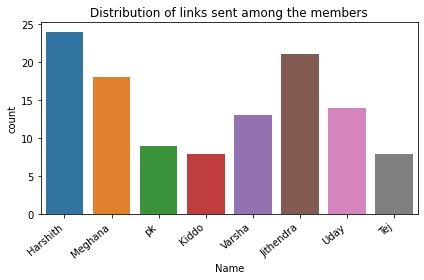

In [27]:
#collapse-hide
ax = sns.countplot(x='Name',data=df_links)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Distribution of links sent among the members')
plt.tight_layout()
plt.show()

## Emoji distribution

In [28]:
#collapse-hide
emojis = [i for j in df.emoji for i in j]
emoji_dict = dict(Counter(emojis))
emoji_dict = sorted(emoji_dict.items(),key=lambda x:x[1],reverse=True)

df_emoji = pd.DataFrame(emoji_dict, columns=['emoji','emoji_count'])
print('Top 10 emojis in the group: ')
df_emoji.head(10).style.hide_index()

Top 10 emojis in the group: 


emoji,emoji_count
😂,1286
🤣,198
😅,171
😒,123
🥴,93
😁,87
😏,70
😭,64
🥺,63
🙄,62


## Top 10 emojis used in the group

In [29]:
#collapse-hide
fig = px.pie(df_emoji.head(10), values='emoji_count', names='emoji', title='Top 10 emojis in the group')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Top 10 emojis used by each group member

In [30]:
#collapse-hide
for i in range(len(names)):
    df_name = df[df['Name'] == names[i]]
    emojis = [i for j in df_name.emoji for i in j]
    emoji_dict = dict(Counter(emojis))
    emoji_dict = sorted(emoji_dict.items(),key=lambda x:x[1],reverse=True)
    
    print(f'Emoji distribution for {names[i]}')

    df_emoji_name = pd.DataFrame(emoji_dict, columns=['emoji','emoji_count'])
    df_emoji_name2 = df_emoji_name.head(10)
    display(df_emoji_name2.style.hide_index())

Emoji distribution for Harshith


emoji,emoji_count
😂,249
🤓,37
😁,35
😆,30
😅,23
😝,18
😭,17
🤦🏻‍♂️,14
😨,12
😎,11


Emoji distribution for Meghana


emoji,emoji_count
😂,100
🤣,22
🥺,15
😅,12
😏,11
🙄,11
😒,10
😐,10
🤷🏻‍♀️,9
😭,9


Emoji distribution for pk


emoji,emoji_count
😂,159
😒,48
😁,17
🤦🏻‍♀️,16
🥺,15
🤷🏻‍♀️,13
😭,12
😍,9
🤭,7
😬,7


Emoji distribution for Jithendra


emoji,emoji_count
😂,193
😬,29
😇,24
😏,20
😅,17
🤘,17
😁,16
🙄,15
😑,15
😄,14


Emoji distribution for Uday


emoji,emoji_count
🤣,78
😅,35
🥴,21
🖤,21
😁,16
🤙,14
😎,13
🤟,3
🤙🏼,3
💡,2


Emoji distribution for Varsha


emoji,emoji_count
😂,369
😅,53
😒,45
🥴,44
🤣,41
🤗,28
🥵,27
😎,25
😐,23
😍,22


Emoji distribution for Kiddo


emoji,emoji_count
😂,64
🤣,52
🙈,12
🤭,11
🥺,8
🥳,8
😘,7
🥴,7
🔥,5
🙄,5


Emoji distribution for Tej


emoji,emoji_count
😂,151
🤭,29
😅,29
🙄,17
😏,14
🤷‍♀,11
😳,11
🥴,9
🤷‍♀️,9
🤦‍♀,8
